In [1]:
# No other libraries other than the given libraries are allowed.
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
terminal_states_4 = [5, 7, 11, 12,15] # Terminal states for 4 by 4 frozen lake environment
terminal_states_8 = [19, 29, 35, 41, 42, 46, 49, 52, 54, 59,63] # Terminal states for 8 by 8 frozen lake environment

rewards_4 = [0 for i in range(16)]
rewards_8 = [0 for i in range(64)]

rewards_4[-1] = 1
rewards_8[-1] = 1


actions = {
"LEFT" : 0,
"DOWN" : 1,
"RIGHT" : 2,
"UP" : 3
}

In [3]:
target_policy_four = np.array([0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0])

target_policy_eight = np.array([3, 2, 2, 2, 2, 0, 2, 0, 3, 3, 3, 0, 0, 2, 2, 1, 3, 3, 0, 3, 2, 3, 2, 1,
 3, 3, 3, 1, 0, 2, 2, 1, 3, 3, 0, 2, 2, 1, 3, 2, 0, 0, 2, 1, 3, 0, 3, 2,
 0, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 3, 1, 1, 1, 0])

In [4]:
def state_from_coordinates(state, map_size): #state = (2,1) should return 9 if map size 4
    return (map_size * state[0] + state[1])

def get_states(state,action,map_size): #given an action and state and map size, find the next states

    reachable_states = []

    col = state % map_size
    row = (state - col) // map_size

    if (action == 0): #state on the left, up and down : action left

        reachable_states = [(row, col - 1),(row - 1, col),(row + 1, col)]

    if(action == 1): #action : down. get the state below right and left

        reachable_states = [(row + 1,col),(row, col - 1),(row, col + 1)]

    if(action == 2): #action is right, get state on the right up and down

        reachable_states = [(row, col + 1),(row+1, col),(row - 1, col)]

    if(action == 3): #action is up, get the state up, right and left

        reachable_states = [(row - 1, col),(row, col + 1),(row, col - 1)]


    #if the action takes out of the grid replace that unwanted state with the current state

    next_states = []

    for i in reachable_states:

        if(i[0] < 0 or i[0] > map_size - 1 or i[1] < 0 or i[1] > map_size - 1):
            next_states.append(state)

        else:
            next_states.append(state_from_coordinates(i, map_size))



    return next_states

def next_state(state, action, map_size): #given an state and an action return the next state under a fixed probability
    nbhd = get_states(state, action, map_size)
    x = [1/3,1/3,1/3]

    next_state = np.random.choice(nbhd,p = x)

    return next_state

def step_in(state,action, map_size): #given a state action pair return the next state, the reward and wheather terminal or not
    
    terminal = False
    reward = None
    terminal_states = None
    if map_size == 4:
        terminal_states = terminal_states_4
        reward = rewards_4
    if map_size == 8:
        terminal_states = terminal_states_8
        reward = rewards_8

    next_state_temp = next_state(state,action,map_size)

    if next_state_temp in terminal_states:
        terminal = True


    return next_state_temp, reward[next_state_temp], terminal
    
def epsilon_greedy(row,epsilon):
    max_index = np.argmax(row)
    x = [epsilon/3 for i in range(4)]
    x[max_index] = 1 - epsilon
    possible_actions = [i for i in range(4)]
    next_action = np.random.choice(possible_actions,p = x)

    return next_action

    







In [5]:
testing = [0,0,0,0]
print(epsilon_greedy(testing,0.4))

2


In [6]:
np.random.rand()

0.4213628175750217

In [7]:
class RLTables:

    def __init__(self, map_size):
        self.map_size = map_size
        self.total_states = map_size * map_size
        self.goal_state = self.total_states - 1

    def initialize_value_table(self):

        self.value_table = np.zeros(self.total_states)



    def initialize_q_table(self):

        self.q_table = np.zeros((self.total_states, 4))





    def initialize_random_policy(self):


        self.policy = np.random.randint(0,3,self.total_states)

        if self.map_size == 4:
            self.terminal_states = terminal_states_4
        if self.map_size == 8:
            self.terminal_states = terminal_states_8

        for state in self.terminal_states: # Change this when you are solving for the 8 by 8 frozen lake environment.
            self.policy[state] = -1

        self.policy[self.goal_state] = -2


    def print_all_tables(self):

        print("Value Table")
        print(self.value_table)
        print("\nQ-Table")
        print(self.q_table)
        print("Policy")
        print(self.policy)
        print("Reward")
        print(self.reward)

    def get_tables(self):
        return self.policy, self.value_table, self.q_table, self.reward


    def initialize_reward(self):
        self.reward = np.zeros(self.total_states)
        self.reward[self.goal_state] = 1



    def initialize_all_tables(self):
        self.initialize_random_policy()
        self.initialize_value_table()
        self.initialize_q_table()
        self.initialize_reward()



    def temporal_difference():
        return None
        

In [8]:
class Plot(RLTables):
    def __init__(self, map_size):
        super().__init__(map_size)
        self.directions = {-2: "G", -1: " ", 0: "←", 1: "↓", 2: "→", 3: "↑"}

    def convert_policy_to_arrows(self):

        def replace_with_direction(num):
            return self.directions[num]

        vectorized_replace = np.vectorize(replace_with_direction)

        result_array = vectorized_replace(self.policy)

        return result_array

    def show_policy_table(self):
        arrow_based_policy = self.convert_policy_to_arrows()

        self.data = list(arrow_based_policy.reshape(self.map_size, self.map_size))

        # Create a figure and axis
        _, ax = plt.subplots()
        colors = plt.cm.BuPu(np.full((self.map_size, self.map_size), 0.1))


        self.table = ax.table(cellText=self.data, loc='center', cellLoc='center', colLabels=None, cellColours=colors)

        if self.map_size == 4:
                self.table.scale(0.6, 4)
        elif self.map_size == 8:
                self.table.scale(0.5, 2)

        # Hide axis
        ax.axis('off')

        # Customize cell properties (optional)
        self.table.auto_set_font_size(False)
        self.table.set_fontsize(25)
        self.table.scale(1.5, 1.5)  # Adjust cell size as needed
        ax.axis('off')  # Turn off the axis

    def show_value_table(self):



        self.show_policy_table()

        if self.map_size == 8:
            self.table.set_fontsize(10)

        for i in range(self.map_size):
                    for j in range(self.map_size):

                            cell_text = self.data[i][j]

                            if cell_text == " " or cell_text == "G":
                                    continue

                            cell = self.table[i, j]

                            number_text = str(round( self.value_table[self.map_size*i + j], 2))
                            full_text = cell_text + '\n' + number_text
                            cell.get_text().set_text(full_text)


    def show_q_table(self):

        self.show_policy_table()

        if self.map_size == 4:
            self.table.set_fontsize(10)
        elif self.map_size == 8:
            self.table.set_fontsize(5)



        for i in range(self.map_size):
                        for j in range(self.map_size):

                                cell_text = self.data[i][j]

                                if cell_text == " " or cell_text == "G":
                                        continue


                                cell = self.table[i, j]

                                number_text2 = str(round( self.q_table[self.map_size*i + j][0], 2))
                                number_text4 = str(round( self.q_table[self.map_size*i + j][1], 2))
                                number_text3 = str(round( self.q_table[self.map_size*i + j][2], 2))
                                number_text1 = str(round( self.q_table[self.map_size*i + j][3], 2))

                                full_text = number_text1 + "\n\n" + number_text2 + "  " + cell_text + "  " + number_text3 + "\n\n" + number_text4

                                cell.get_text().set_text(full_text)


    def show_all_tables(self):
        self.show_policy_table()
        self.show_value_table()
        self.show_q_table()


In [9]:
def TD_1(epsilon,alpha,gamma,map_size, no_episodes, log_step): #higher epsilon means more exploitation
    
    
    
    print(f"Epsilon = {epsilon}")
    data_to_plot = {}
    truncation = 0
    if(map_size == 4):
        truncation = 100
    if(map_size == 8):
        truncation = 300
    #init Q table
    total_actions = 4 
    total_states = map_size*map_size
    q_table = np.zeros((total_states,total_actions))
    # print(q_table)
    reward_thousand = 0
    value_table_at_t = [[] for i in range(total_states)]

    for i in range(no_episodes+1):
        if(i % 1000 == 0 and i > 0):
            
            if(epsilon > 0):
                epsilon = epsilon - 0.05
            if(epsilon < 0):
                epsilon = 0

        if(i % log_step == 0 and i > 0):
            print(f"episode : {i} , cumulative reward : {reward_thousand / log_step}")
            data_to_plot[i] = reward_thousand / log_step
            reward_thousand = 0
            for i in range(total_states):
                value_table_at_t[i].append(np.max(q_table[i]))

        cur_state = 0
        cur_action = None
        is_terminal = False
        truncated = 1
        while(not is_terminal and truncated <= truncation):

            cur_action = epsilon_greedy(q_table[cur_state], epsilon)
            next_state, reward, is_terminal = step_in(cur_state,cur_action,map_size) 
            delta = reward + gamma*np.max(q_table[next_state]) - q_table[cur_state][cur_action]
            q_table[cur_state][cur_action] = q_table[cur_state][cur_action] + alpha*delta
            cur_state = next_state
            truncated+=1
            reward_thousand+=reward

    print("\n")
    return q_table, data_to_plot, value_table_at_t
                

# Four by Four

In [10]:

q_table_four_3, data_plot_3, value_table_3 = TD_1(0.3, 0.90,0.90,4,20000,3100) 
q_table_four_4, data_plot_4, value_table_4 = TD_1(0.4, 0.90,0.90,4,20000,3100) 
q_table_four_5, data_plot_5, value_table_5 = TD_1(0.5, 0.90,0.90,4,20000,3100) 

Epsilon = 0.3


episode : 3100 , cumulative reward : 0.046129032258064515
episode : 6200 , cumulative reward : 0.16580645161290322
episode : 9300 , cumulative reward : 0.6929032258064516
episode : 12400 , cumulative reward : 0.7341935483870968
episode : 15500 , cumulative reward : 0.6767741935483871
episode : 18600 , cumulative reward : 0.5290322580645161


Epsilon = 0.4
episode : 3100 , cumulative reward : 0.031612903225806455
episode : 6200 , cumulative reward : 0.06870967741935484
episode : 9300 , cumulative reward : 0.35161290322580646
episode : 12400 , cumulative reward : 0.714516129032258
episode : 15500 , cumulative reward : 0.7180645161290322
episode : 18600 , cumulative reward : 0.7222580645161291


Epsilon = 0.5
episode : 3100 , cumulative reward : 0.02258064516129032
episode : 6200 , cumulative reward : 0.04516129032258064
episode : 9300 , cumulative reward : 0.08612903225806452
episode : 12400 , cumulative reward : 0.5787096774193549
episode : 15500 , cumulative reward : 0.7222580645161291

In [11]:
q_table_four_5

array([[1.70735067e-01, 2.93208924e-04, 1.94378537e-04, 2.86958655e-04],
       [1.25498516e-05, 8.32205662e-06, 1.87163440e-05, 3.61478325e-01],
       [3.32737047e-05, 1.78868367e-05, 2.49258475e-05, 1.68256173e-01],
       [5.58104278e-06, 1.68662765e-05, 1.36620949e-05, 5.01585430e-03],
       [1.56708843e-01, 1.17734154e-04, 8.91034134e-05, 5.67330336e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.23536380e-02, 7.50464595e-09, 4.14747703e-09, 2.47393724e-09],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.44275394e-07, 7.14975591e-05, 4.45879985e-04, 9.97283219e-02],
       [2.99298227e-04, 5.24934939e-01, 2.78538328e-04, 1.26922755e-04],
       [6.94378719e-01, 8.02771254e-06, 5.87728882e-06, 1.07437910e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.40202150e-03, 1.53477663e-03, 5.64737514e

In [12]:
optimal_policies_four = np.zeros(16)

for i in range(16):
    optimal_policies_four[i] = np.argmax(q_table_four_5[i])
    

In [13]:
optimal_policies_four

array([0., 3., 3., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.])

### Success On Four by Four

In [14]:
#testing
env = gym.make("FrozenLake-v1", is_slippery=True,map_name = '4x4')
# env.action_space.seed(42)

observation, info = env.reset()

failure_count = 0
success_count = 0

for i in range(100000):
    # print(i)
    done = False
    while not done:
        observation, reward, terminated, truncated, info = env.step(optimal_policies_four[observation])

        # print("Observation:", observation)
        # print("Reward:", reward)
        # print("Terminated:", terminated)
        # print("Truncated:", truncated)
        # print("Info:", info)

        if observation == 15:
            success_count += 1
            # print(i)


        if terminated or truncated:
            # print(failure_count)
            observation, info = env.reset()
            done = True
            # failure_count += 1

env.close()



print(f"Success Percentage on 4 by 4 grid is : {success_count/100000 * 100}%")

Success Percentage on 4 by 4 grid is : 73.898%


### Plots of Rewards against Epsilon

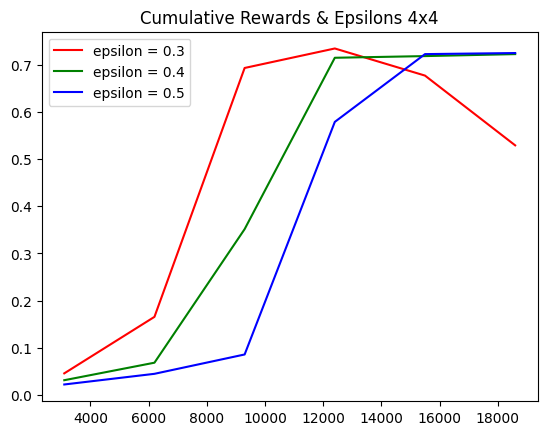

In [15]:
steps = np.array(list(data_plot_3.keys()))
steps

plt.plot( steps,list(data_plot_3.values()), color = 'red', label = 'epsilon = 0.3')
plt.plot( steps,list(data_plot_4.values()), color = 'green', label = 'epsilon = 0.4')
plt.plot( steps,list(data_plot_5.values()), color = 'blue', label = 'epsilon = 0.5')

plt.title('Cumulative Rewards & Epsilons 4x4')
plt.legend()
plt.show()

### Various Plots

In [16]:
# q_table_four_5 ,optimal_policies_four,value_table_5

env_4 = Plot(4)
env_4.initialize_all_tables()
env_4.policy = optimal_policies_four
env_4.q_table = q_table_four_5


for i in range(16):
    env_4.value_table[i] = max(value_table_5[i][:])


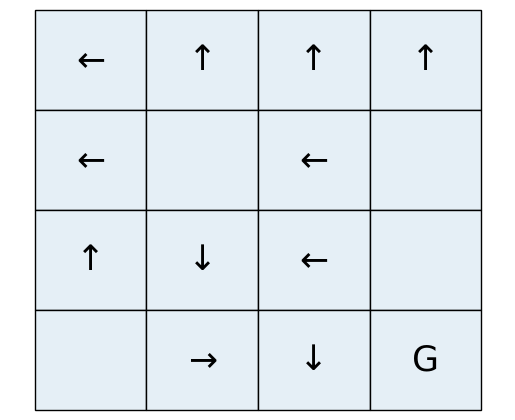

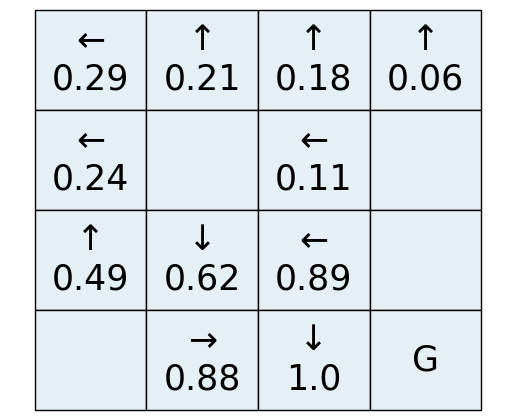

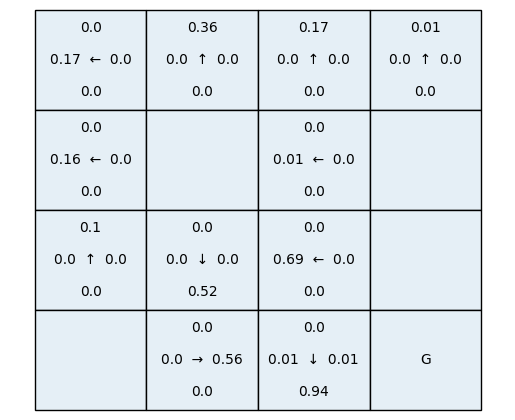

In [17]:
for i in range(16):
    if i in terminal_states_4:
        env_4.policy[i] = -1
    if i == 15:
        env_4.policy[i] = -2


env_4.policy

# env_4.show_policy_table()
env_4.show_all_tables()

In [18]:


steps

for i in steps:
    print(f"Episode : {i}\n")
    n = 0
    
    for i in range(16):
        print(f"state : {i}, Value : {round(value_table_5[i][n],2)}")
    
    n+=1
    print("\n")

Episode : 3100

state : 0, Value : 0.25
state : 1, Value : 0.18
state : 2, Value : 0.18
state : 3, Value : 0.05
state : 4, Value : 0.24
state : 5, Value : 0.0
state : 6, Value : 0.11
state : 7, Value : 0.0
state : 8, Value : 0.46
state : 9, Value : 0.59
state : 10, Value : 0.87
state : 11, Value : 0.0
state : 12, Value : 0.0
state : 13, Value : 0.85
state : 14, Value : 1.0
state : 15, Value : 0.0


Episode : 6200

state : 0, Value : 0.25
state : 1, Value : 0.18
state : 2, Value : 0.18
state : 3, Value : 0.05
state : 4, Value : 0.24
state : 5, Value : 0.0
state : 6, Value : 0.11
state : 7, Value : 0.0
state : 8, Value : 0.46
state : 9, Value : 0.59
state : 10, Value : 0.87
state : 11, Value : 0.0
state : 12, Value : 0.0
state : 13, Value : 0.85
state : 14, Value : 1.0
state : 15, Value : 0.0


Episode : 9300

state : 0, Value : 0.25
state : 1, Value : 0.18
state : 2, Value : 0.18
state : 3, Value : 0.05
state : 4, Value : 0.24
state : 5, Value : 0.0
state : 6, Value : 0.11
state : 7, Va

# Eight By Eight

In [19]:
# q_table_eight_4, data_plot_4 = TD_1(0.4, 0.50,0.90,8,30000,5000) 
# q_table_eight_5, data_plot_5 = TD_1(0.5, 0.50,0.90,8,30000,5000) 
q_table_eight_6, data_plot_6,value_table_6 = TD_1(0.6, 0.50,0.90,8,30000,5000) 
q_table_eight_7, data_plot_7,value_table_7 = TD_1(0.7,0.5,0.9,8,30000,5000)
# q_table_eight_7, data_plot_7 = TD_1(0.7,0.5,0.9,8,30000,500)


Epsilon = 0.6
episode : 5000 , cumulative reward : 0.0002
episode : 10000 , cumulative reward : 0.0
episode : 15000 , cumulative reward : 0.0
episode : 20000 , cumulative reward : 0.0
episode : 25000 , cumulative reward : 0.0
episode : 30000 , cumulative reward : 0.0


Epsilon = 0.7
episode : 5000 , cumulative reward : 0.0054
episode : 10000 , cumulative reward : 0.0218
episode : 15000 , cumulative reward : 0.1954
episode : 20000 , cumulative reward : 0.617
episode : 25000 , cumulative reward : 0.6754
episode : 30000 , cumulative reward : 0.6956




In [20]:
optimal_policies_eight = np.zeros(64)

for i in range(64):
    optimal_policies_eight[i] = np.argmax(q_table_eight_7[i])


In [21]:
optimal_policies_eight

array([3., 2., 2., 2., 2., 2., 2., 2., 3., 2., 3., 3., 2., 2., 1., 1., 2.,
       3., 0., 0., 2., 3., 2., 1., 3., 3., 0., 1., 0., 0., 2., 1., 0., 3.,
       0., 0., 2., 1., 3., 1., 0., 0., 0., 2., 3., 0., 0., 2., 0., 0., 2.,
       3., 0., 2., 0., 2., 0., 1., 0., 0., 2., 2., 1., 0.])

### Success Eight by Eight

In [22]:
#testing
env = gym.make("FrozenLake-v1", is_slippery=True,map_name = '8x8')
# env.action_space.seed(42)

observation, info = env.reset()

failure_count = 0
success_count = 0

for i in range(100000):
    # print(i)
    done = False
    while not done:
        observation, reward, terminated, truncated, info = env.step(optimal_policies_eight[observation])

        # print("Observation:", observation)
        # print("Reward:", reward)
        # print("Terminated:", terminated)
        # print("Truncated:", truncated)
        # print("Info:", info)

        if observation == 63:
            success_count += 1
            # print(i)


        if terminated or truncated:
            # print(failure_count)
            observation, info = env.reset()
            done = True
            # failure_count += 1

env.close()



print(f"Success Percentage on 8 by 8 grid is : {success_count/100000 * 100}%")

Success Percentage on 8 by 8 grid is : 45.356%


### Plots Eight by Eight

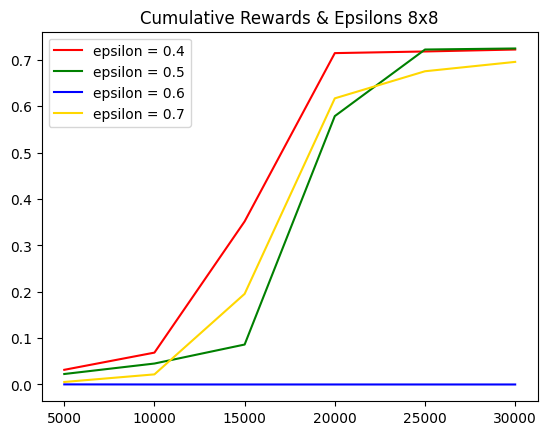

In [23]:
steps = np.array(list(data_plot_6.keys()))
steps

plt.plot( steps,list(data_plot_4.values()), color = 'red', label = 'epsilon = 0.4')
plt.plot( steps,list(data_plot_5.values()), color = 'green', label = 'epsilon = 0.5')
plt.plot( steps,list(data_plot_6.values()), color = 'blue', label = 'epsilon = 0.6')
plt.plot( steps,list(data_plot_7.values()), color = 'gold', label = 'epsilon = 0.7')

plt.title('Cumulative Rewards & Epsilons 8x8')
plt.legend()
plt.show()

### Further Plots

In [24]:
#optimal_policies_eight,q_table_eight_7, data_plot_7,value_table_7

env_8 = Plot(8)
env_8.initialize_all_tables()
env_8.policy = optimal_policies_eight
env_8.q_table = q_table_eight_7


for i in range(64):
    env_8.value_table[i] = max(value_table_7[i][:])
    


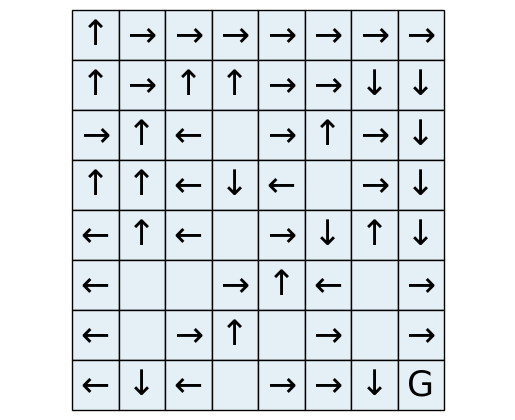

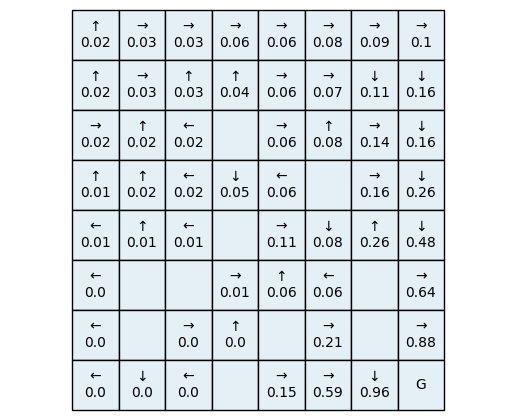

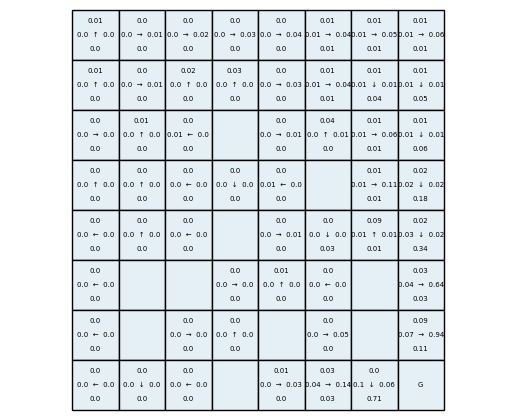

In [25]:
for i in range(64):
    if i in terminal_states_8:
        env_8.policy[i] = -1
    if i == 63:
        env_8.policy[i] = -2


env_8.policy

# env_8.show_policy_table()
env_8.show_all_tables()

In [26]:


steps

for i in steps:
    print(f"Episode : {i}\n")
    n = 0
    
    for i in range(64):
        print(f"state : {i}, Value : {round(value_table_7[i][n], 2)}")
    
    n+=1
    print("\n")

Episode : 5000

state : 0, Value : 0.02
state : 1, Value : 0.03
state : 2, Value : 0.03
state : 3, Value : 0.06
state : 4, Value : 0.06
state : 5, Value : 0.08
state : 6, Value : 0.09
state : 7, Value : 0.09
state : 8, Value : 0.02
state : 9, Value : 0.03
state : 10, Value : 0.03
state : 11, Value : 0.04
state : 12, Value : 0.06
state : 13, Value : 0.07
state : 14, Value : 0.11
state : 15, Value : 0.14
state : 16, Value : 0.02
state : 17, Value : 0.02
state : 18, Value : 0.02
state : 19, Value : 0.0
state : 20, Value : 0.06
state : 21, Value : 0.07
state : 22, Value : 0.14
state : 23, Value : 0.16
state : 24, Value : 0.01
state : 25, Value : 0.02
state : 26, Value : 0.02
state : 27, Value : 0.05
state : 28, Value : 0.06
state : 29, Value : 0.0
state : 30, Value : 0.16
state : 31, Value : 0.26
state : 32, Value : 0.01
state : 33, Value : 0.01
state : 34, Value : 0.01
state : 35, Value : 0.0
state : 36, Value : 0.11
state : 37, Value : 0.08
state : 38, Value : 0.26
state : 39, Value : 0.